<a href="https://colab.research.google.com/github/manogna1105/Flipkart-Reviews/blob/main/Flipkart_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flipkart Reviews Sentiment Analysis using Python**

Sentiment analysis is a NLP task used to determine the sentiment behind textual data. In context of product reviews it helps in understanding whether the feedback given by customers is positive, negative or neutral.

**Code Implementation of Sentiment Analysis on Flipkart Reviews**

**1. Importing Libraries and Dataset**

We will be using libraries like Pandas, Scikit-learn, NLTK, Matplotlib, Wordcloud and Seaborn for this. You can download the dataset by clicking this link.

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

file_path = '/content/flipkart_data.csv'
df = pd.read_csv(file_path)


df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


**2. Preprocessing the Data**

The next step is preprocessing the data which involves cleaning the review text and preparing the sentiment labels.

In [3]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_reviews_stopwords(df):
    df['review'] = df['review'].str.lower()
    df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
    return df

df_cleaned = preprocess_reviews_stopwords(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**3. Visualizing the Data**

Before we proceed with model making it's important to explore the dataset. We can visualize the distribution of sentiment labels and analyze the frequency of words in positive reviews.

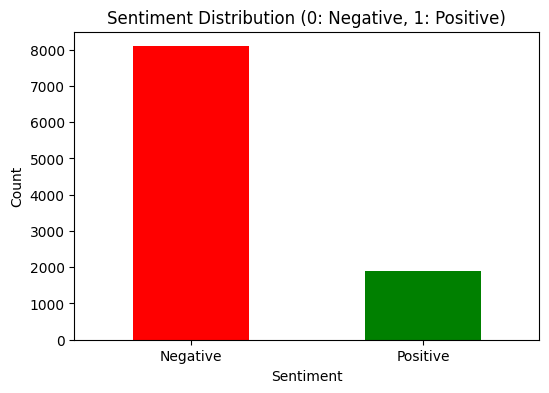

In [4]:
sentiment_counts = df_cleaned['sentiment'].value_counts()
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Sentiment Distribution (0: Negative, 1: Positive)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()

**Word Cloud for Positive Reviews**

Next, we'll create a Wordcloud to visualize the most frequent words in positive reviews.

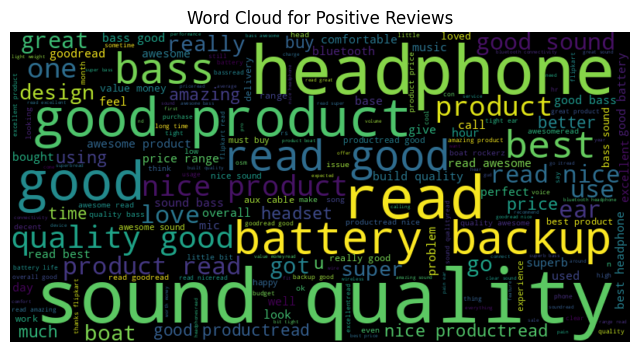

In [5]:
positive_reviews = df_cleaned[df_cleaned['sentiment'] == 1]['review']
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

**4. Vectorizing the Text Data**

Machine learning models require numerical input so we need to convert the textual reviews into numerical vectors. We will use TF-IDF (Term Frequency-Inverse Document Frequency) which helps converting these texts into vectors.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_cleaned['review'])
y = df_cleaned['sentiment']

**5. Model Training, Evaluation and Prediction**

Now that the data is prepared we can split it into training and testing sets where 80% data is used for training and rest is used for testing.

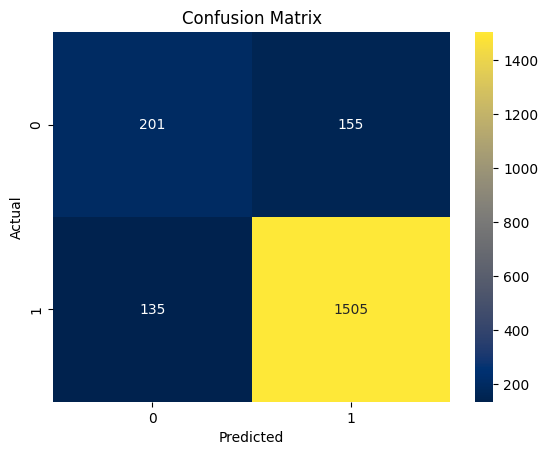

0.8547094188376754


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix , annot=True,fmt='d', cmap="cividis")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(accuracy)

We are able to classify reviews as positive or negative with an accuracy of approximately 86% which is great for a machine learning model but we can further fine tune this model to get better accuracy for more complex task.